# Explore here

In [18]:
#importar libreria
import pandas as pd

In [19]:
#traer dataset
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')

In [20]:
#visualizar df
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [21]:
#obtener dimensiones
df.shape

(41188, 21)

In [22]:
#informacion de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
#buscar duplicados
df.duplicated().sum()

np.int64(12)

In [24]:
#eliminar info irrelevante (columnas) y luego revisar de nuevo duplicados de columnas que necesite 
eliminar_columnas = ['marital', 'education', 'contact', 'month', 'day_of_week', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']
df.drop(eliminar_columnas, axis=1, inplace=True)

In [25]:
df

,age,job,default,housing,loan,duration,campaign,poutcome,emp.var.rate,euribor3m,y
0,56,housemaid,no,no,no,261,1,nonexistent,1.1,4.857,no
1,57,services,unknown,no,no,149,1,nonexistent,1.1,4.857,no
2,37,services,no,yes,no,226,1,nonexistent,1.1,4.857,no
3,40,admin.,no,no,no,151,1,nonexistent,1.1,4.857,no
4,56,services,no,no,yes,307,1,nonexistent,1.1,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,no,yes,no,334,1,nonexistent,-1.1,1.028,yes
41184,46,blue-collar,no,no,no,383,1,nonexistent,-1.1,1.028,no
41185,56,retired,no,yes,no,189,2,nonexistent,-1.1,1.028,no
41186,44,technician,no,no,no,442,1,nonexistent,-1.1,1.028,yes


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  int64  
 1   job           41188 non-null  object 
 2   default       41188 non-null  object 
 3   housing       41188 non-null  object 
 4   loan          41188 non-null  object 
 5   duration      41188 non-null  int64  
 6   campaign      41188 non-null  int64  
 7   poutcome      41188 non-null  object 
 8   emp.var.rate  41188 non-null  float64
 9   euribor3m     41188 non-null  float64
 10  y             41188 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 3.5+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

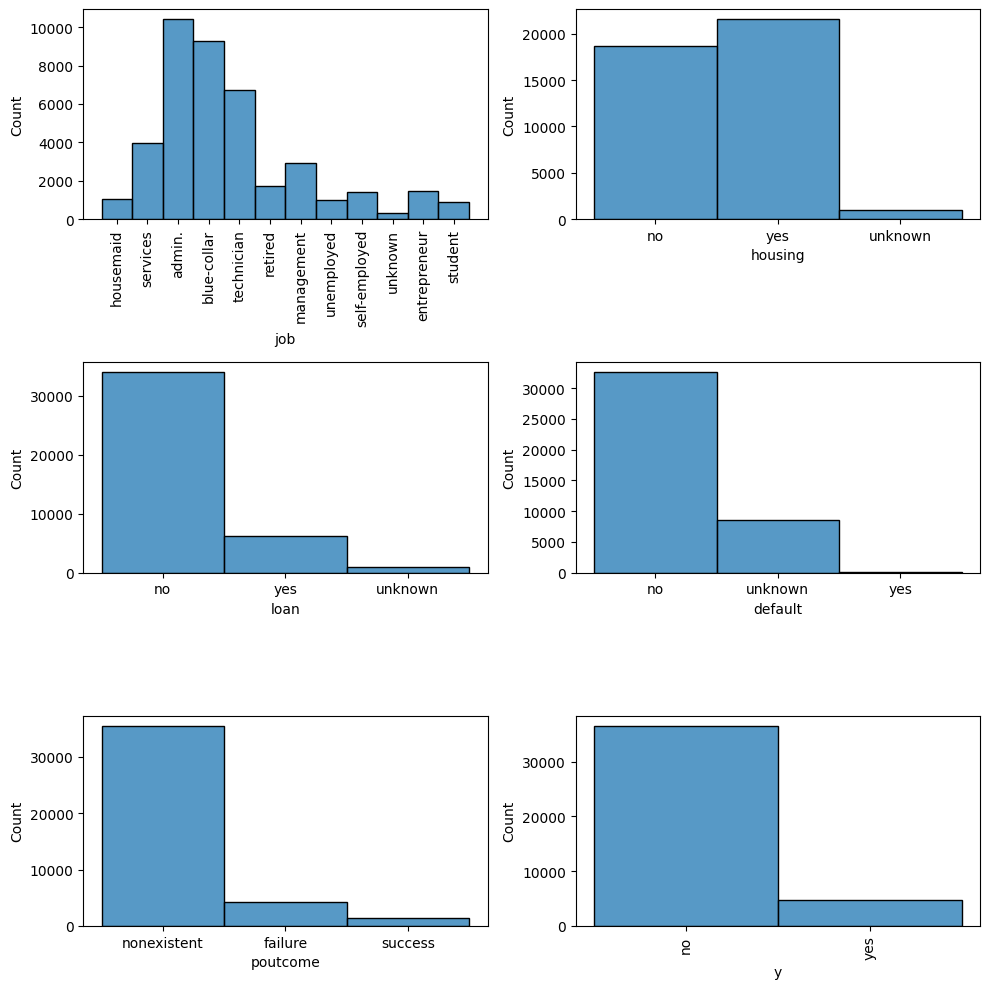

In [30]:
#analisis univariante, categorico 
import matplotlib.pyplot as plt 
import seaborn as sns

#creamos graficos, dos filas y tres columnas, tamaño de la figura 10x7
fig, axis = plt.subplots(3,2, figsize=(10,10))

#histogramas
sns.histplot(ax= axis[0,0], data= df,x= 'job') #trabajo
axis[0,0].tick_params(axis='x', rotation=90) #girar eje x 
sns.histplot(ax= axis[0,1], data= df,x= 'housing') #prestamo de vivienda 
sns.histplot(ax= axis[1,0], data= df,x= 'loan') #prestamo personal 
sns.histplot(ax= axis[1,1], data= df,x= 'default') #credito actualmente
sns.histplot(ax= axis[2,0], data= df,x= 'poutcome') #marketing anterior
sns.histplot(ax= axis[2,1], data= df,x= 'y') #variable predictora

plt.xticks(rotation=90)

#ajuste del grafico
plt.tight_layout()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

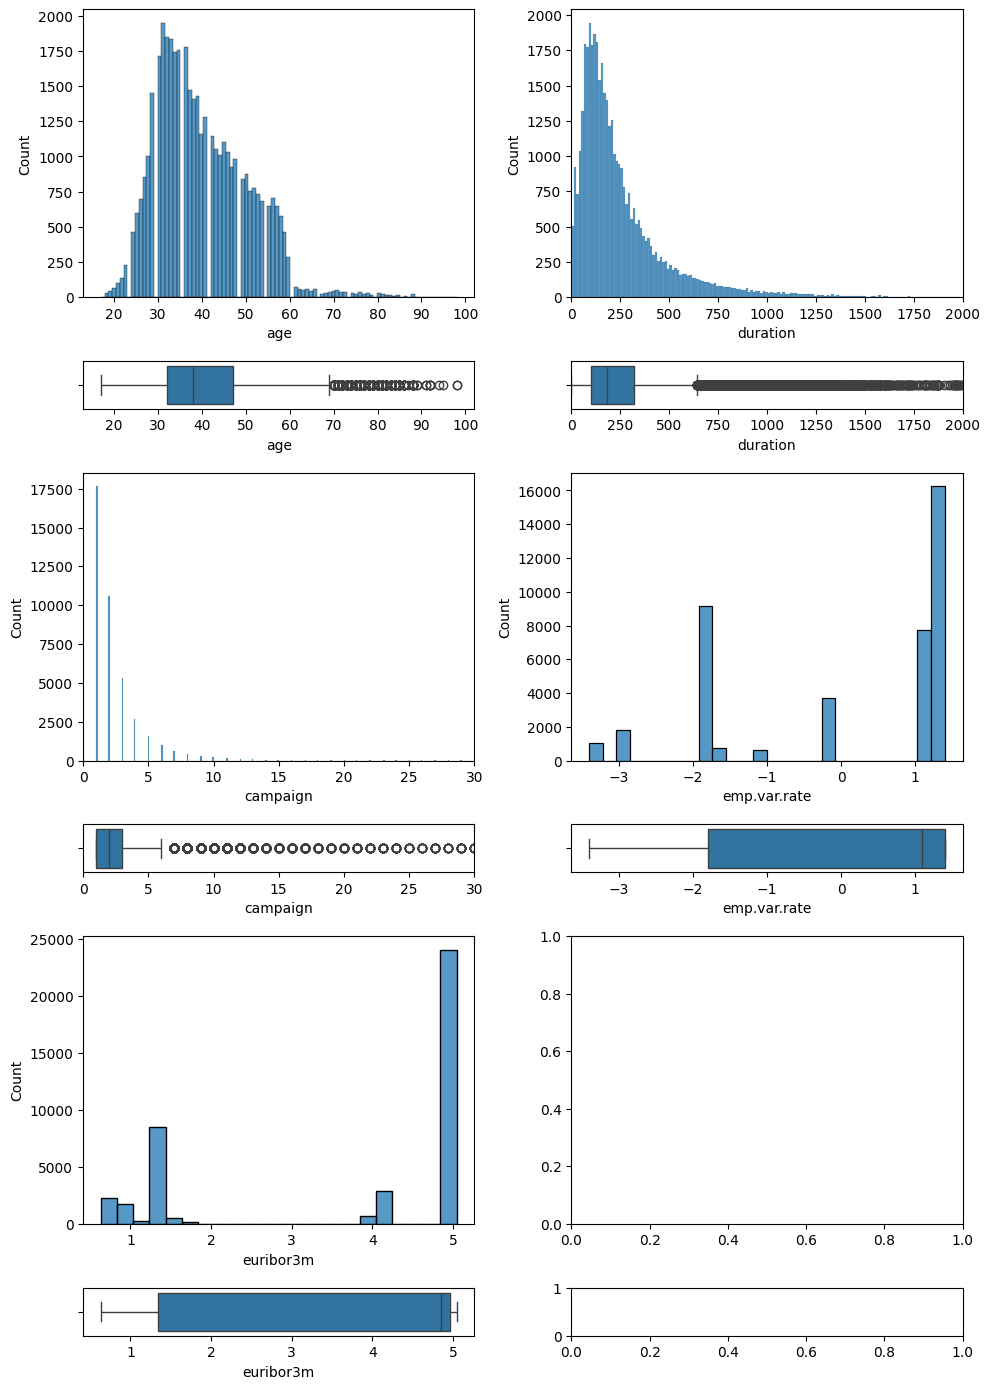

In [40]:
#analisis univariante, numericas
fig, axis = plt.subplots(6,2,figsize=(10,14),gridspec_kw={'height_ratios':[6,1,6,1,6,1]})

sns.histplot(ax=axis[0,0], data= df,x= 'age')
sns.boxplot(ax=axis[1,0], data=df, x='age')

sns.histplot(ax=axis[0,1], data= df,x= 'duration').set_xlim(0,2000)
sns.boxplot(ax=axis[1,1], data=df, x= 'duration').set_xlim(0,2000)

sns.histplot(ax=axis[2,0], data= df,x= 'campaign').set_xlim(0,30)
sns.boxplot(ax=axis[3,0], data=df, x='campaign').set_xlim(0,30)

sns.histplot(ax=axis[2,1], data= df,x= 'emp.var.rate')
sns.boxplot(ax=axis[3,1], data=df, x='emp.var.rate')

sns.histplot(ax=axis[4,0], data= df,x= 'euribor3m')
sns.boxplot(ax=axis[5,0], data=df, x='euribor3m')

plt.tight_layout()
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

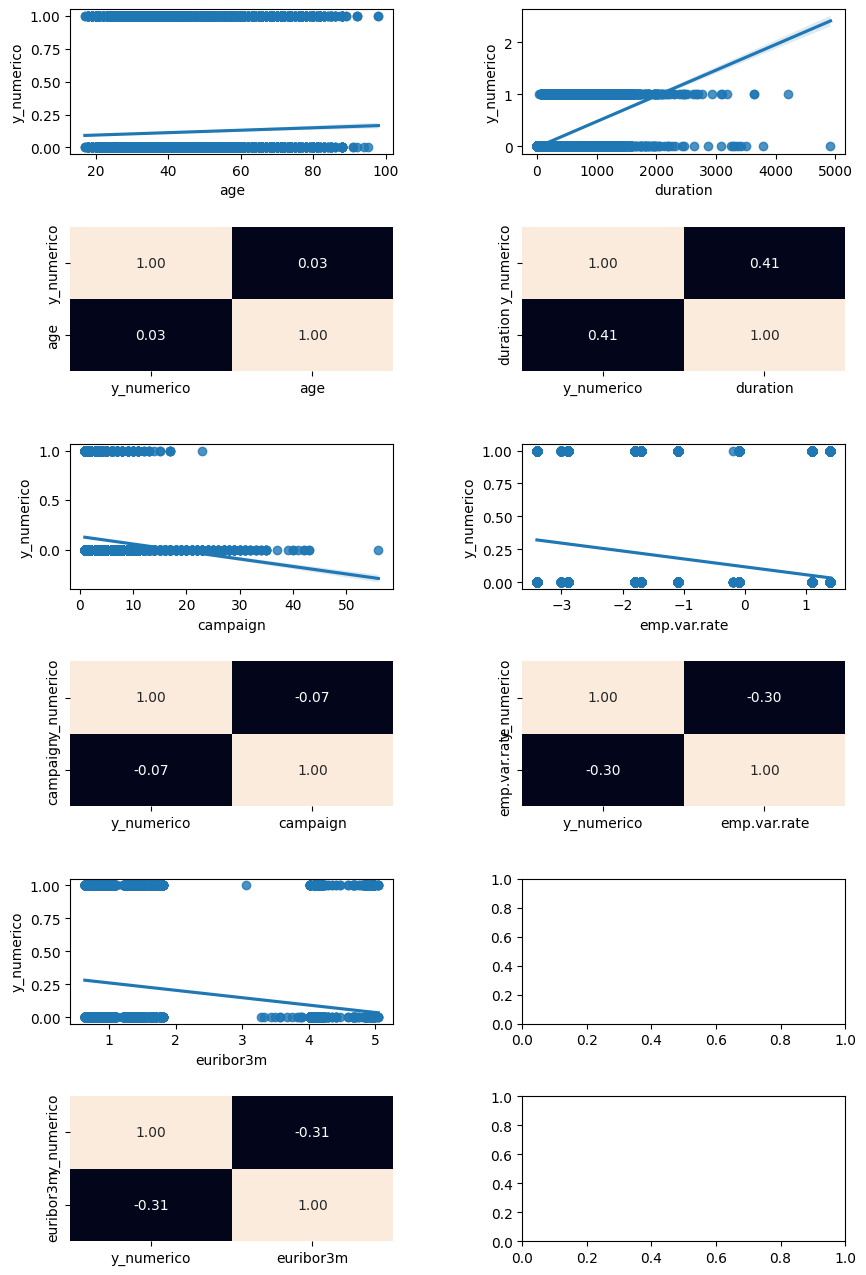

In [53]:
#analisis numerico-numerico
fig, axis = plt.subplots(6,2,figsize=(10,16))

df['y_numerico'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

sns.regplot(ax = axis[0,0], data=df, x='age', y= 'y_numerico')
sns.heatmap(df[['y_numerico', 'age']].corr(),annot=True,fmt='.2f', ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df, x='duration', y= 'y_numerico')
sns.heatmap(df[['y_numerico', 'duration']].corr(),annot=True,fmt='.2f', ax=axis[1,1],cbar=False)

sns.regplot(ax = axis[2,0], data=df, x='campaign', y= 'y_numerico')
sns.heatmap(df[['y_numerico', 'campaign']].corr(),annot=True,fmt='.2f', ax=axis[3,0],cbar=False)

sns.regplot(ax = axis[2,1], data=df, x='emp.var.rate', y= 'y_numerico')
sns.heatmap(df[['y_numerico', 'emp.var.rate']].corr(),annot=True,fmt='.2f', ax=axis[3,1],cbar=False)

sns.regplot(ax = axis[4,0], data=df, x='euribor3m', y= 'y_numerico')
sns.heatmap(df[['y_numerico', 'euribor3m']].corr(),annot=True,fmt='.2f', ax=axis[5,0],cbar=False)

plt.tight_layout
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show

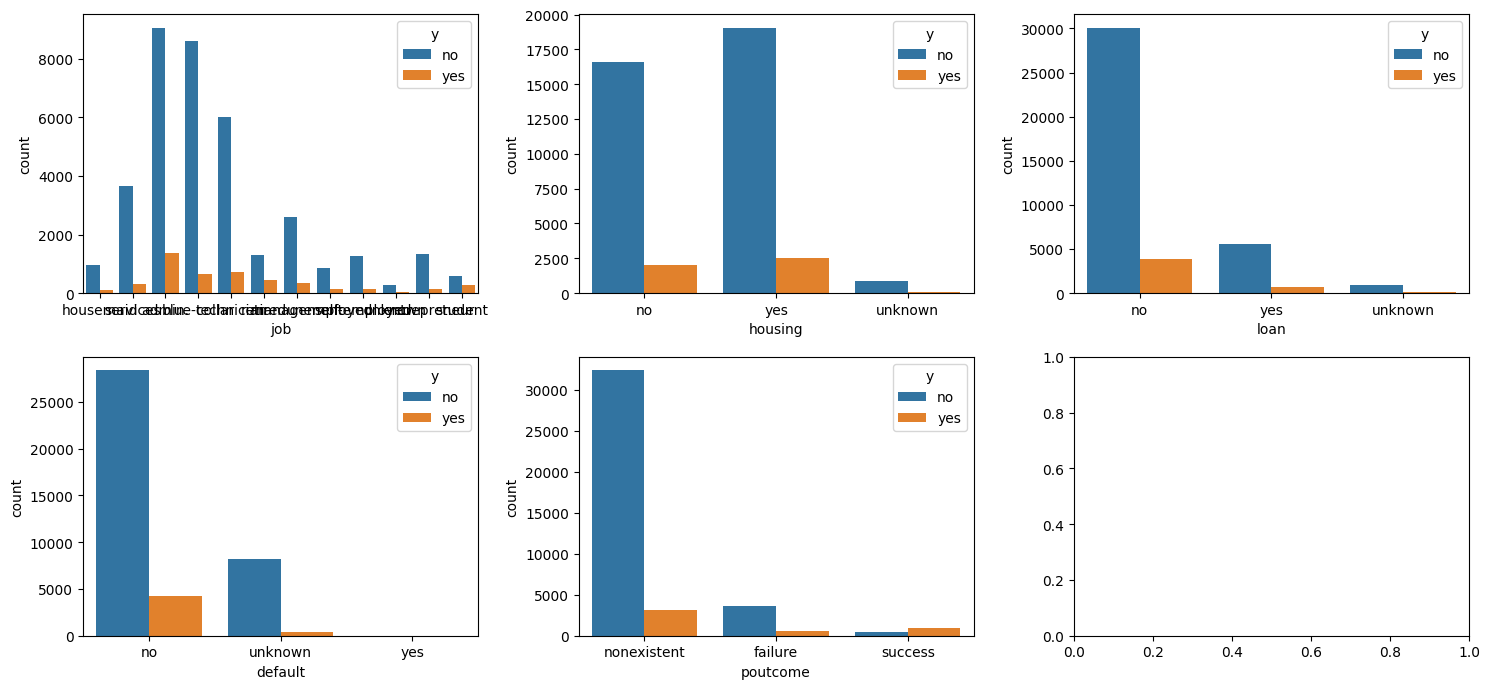

In [56]:
#analisis categorico-categorico
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = df, x = "housing", hue = "y")
sns.countplot(ax = axis[0, 2], data = df, x = "loan", hue = "y")
sns.countplot(ax = axis[1, 0], data = df, x = "default", hue = "y") 
sns.countplot(ax = axis[1, 1], data = df, x = "poutcome", hue = "y")


plt.tight_layout()
plt.show()